<a href="https://colab.research.google.com/github/lbarbozano/APIS/blob/main/calculadora_de_aluguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import re

In [23]:
url = 'https://raw.githubusercontent.com/fernandoawari/calculadora-aluguel-turma-set-20/main/1-web-scraping/dados_aluguel_ml_sao_paulo.csv'

In [ ]:
df.head(10)

,zona,enderecos_lista,area,quartos,aluguel
0,norte,"Praça Rafael Mendes De Carvalho, Jardim Paraís...",50.0,2.0,1150
1,norte,"Rua Almirante Noronha, Jardim São Paulo, São P...",76.0,3.0,1480
2,norte,"Rua Cássio De Almeida, Vila Guilherme, São Pau...",30.0,1.0,800
3,norte,"Rua Cabo José Da Silva, Parque Novo Mundo, São...",80.0,3.0,1180
4,norte,"Parque Domingos Luís, Jardim São Paulo, São Pa...",70.0,2.0,1300
5,norte,"Rua Ciridião Durval, Vila Paulista, São Paulo ...",45.0,1.0,990
6,norte,"Rua Soldado Brasílio Pinto De Almeida, Parque ...",65.0,2.0,980
7,norte,"Rua José Bernardo Pinto, Vila Guilherme, São P...",55.0,2.0,1350
8,norte,"Rua José Ferreira De Castro, Vila Amélia, São ...",49.0,2.0,1430
9,norte,"Rua Coronel Marcílio Franco, Vila Isolina Mazz...",70.0,1.0,1260


In [ ]:
df.tail(10)

,zona,enderecos_lista,area,quartos,aluguel
1334,oeste,"Rua Marechal Hastinfilo De Moura, Vila Suzana,...",140.0,3.0,1600
1335,oeste,"Rua Doutor Alfredo Di Verniere, Conjunto Resid...",25.0,1.0,1230
1336,oeste,"Rua Pedro Colaço, Piqueri, São Paulo Zona Oest...",55.0,2.0,1190
1337,oeste,"Travessa Alberto Campos, Pinheiros, São Paulo ...",98.0,3.0,2600
1338,oeste,"Rua Inácio Luís Da Costa, Parque São Domingos,...",334.0,2.0,2700
1339,oeste,"Rua Piauí, Higienópolis, São Paulo Zona Oeste,...",480.0,4.0,13280
1340,oeste,"Rua Doutor Aires Martins Torres, Vila São Fran...",620.0,4.0,15000
1341,oeste,"Rua Doutor Martins De Oliveira, Jardim Londrin...",64.0,3.0,2390
1342,oeste,"Rua Natingui, Vila Madalena, São Paulo Zona Oe...",44.0,1.0,3600
1343,oeste,"Rua Amaro Cavalheiro, Pinheiros, São Paulo Zon...",150.0,3.0,4000


In [29]:
df.shape

(1344, 5)

In [31]:
df.columns

Index(['zona', 'enderecos_lista', 'area', 'quartos', 'aluguel'], dtype='object')

In [34]:
df['area']

0        50.0
1        76.0
2        30.0
3        80.0
4        70.0
        ...  
1339    480.0
1340    620.0
1341     64.0
1342     44.0
1343    150.0
Name: area, Length: 1344, dtype: float64

In [35]:
df['quartos']

0       2.0
1       3.0
2       1.0
3       3.0
4       2.0
       ... 
1339    4.0
1340    4.0
1341    3.0
1342    1.0
1343    3.0
Name: quartos, Length: 1344, dtype: float64

In [36]:
df['area'].min()

1.0

In [37]:
df['area'].max()

7800.0

In [38]:
df['quartos'].min()

1.0

In [39]:
df['quartos'].max()

5.0

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             1344 non-null   object 
 1   enderecos_lista  1344 non-null   object 
 2   area             1341 non-null   float64
 3   quartos          1273 non-null   float64
 4   aluguel          1344 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 52.6+ KB


In [41]:
df.dropna()

,zona,enderecos_lista,area,quartos,aluguel
0,norte,"Praça Rafael Mendes De Carvalho, Jardim Paraís...",50.0,2.0,1150
1,norte,"Rua Almirante Noronha, Jardim São Paulo, São P...",76.0,3.0,1480
2,norte,"Rua Cássio De Almeida, Vila Guilherme, São Pau...",30.0,1.0,800
3,norte,"Rua Cabo José Da Silva, Parque Novo Mundo, São...",80.0,3.0,1180
4,norte,"Parque Domingos Luís, Jardim São Paulo, São Pa...",70.0,2.0,1300
...,...,...,...,...,...
1339,oeste,"Rua Piauí, Higienópolis, São Paulo Zona Oeste,...",480.0,4.0,13280
1340,oeste,"Rua Doutor Aires Martins Torres, Vila São Fran...",620.0,4.0,15000
1341,oeste,"Rua Doutor Martins De Oliveira, Jardim Londrin...",64.0,3.0,2390
1342,oeste,"Rua Natingui, Vila Madalena, São Paulo Zona Oe...",44.0,1.0,3600


In [42]:
df.fillna(-1)

,zona,enderecos_lista,area,quartos,aluguel
0,norte,"Praça Rafael Mendes De Carvalho, Jardim Paraís...",50.0,2.0,1150
1,norte,"Rua Almirante Noronha, Jardim São Paulo, São P...",76.0,3.0,1480
2,norte,"Rua Cássio De Almeida, Vila Guilherme, São Pau...",30.0,1.0,800
3,norte,"Rua Cabo José Da Silva, Parque Novo Mundo, São...",80.0,3.0,1180
4,norte,"Parque Domingos Luís, Jardim São Paulo, São Pa...",70.0,2.0,1300
...,...,...,...,...,...
1339,oeste,"Rua Piauí, Higienópolis, São Paulo Zona Oeste,...",480.0,4.0,13280
1340,oeste,"Rua Doutor Aires Martins Torres, Vila São Fran...",620.0,4.0,15000
1341,oeste,"Rua Doutor Martins De Oliveira, Jardim Londrin...",64.0,3.0,2390
1342,oeste,"Rua Natingui, Vila Madalena, São Paulo Zona Oe...",44.0,1.0,3600


In [43]:
df.describe()

,area,quartos,aluguel
count,1341.000000,1273.000000,1344.000000
mean,112.697987,2.106834,4396.404762
std,259.503149,0.882869,29225.842756
min,1.000000,1.000000,299.000000
25%,48.000000,1.000000,1500.000000
50%,67.000000,2.000000,2200.000000
75%,106.000000,3.000000,3577.500000
max,7800.000000,5.000000,870000.000000


In [44]:
df.median()

area         67.0
quartos       2.0
aluguel    2200.0
dtype: float64

In [45]:
df.fillna(df.median())

,zona,enderecos_lista,area,quartos,aluguel
0,norte,"Praça Rafael Mendes De Carvalho, Jardim Paraís...",50.0,2.0,1150
1,norte,"Rua Almirante Noronha, Jardim São Paulo, São P...",76.0,3.0,1480
2,norte,"Rua Cássio De Almeida, Vila Guilherme, São Pau...",30.0,1.0,800
3,norte,"Rua Cabo José Da Silva, Parque Novo Mundo, São...",80.0,3.0,1180
4,norte,"Parque Domingos Luís, Jardim São Paulo, São Pa...",70.0,2.0,1300
...,...,...,...,...,...
1339,oeste,"Rua Piauí, Higienópolis, São Paulo Zona Oeste,...",480.0,4.0,13280
1340,oeste,"Rua Doutor Aires Martins Torres, Vila São Fran...",620.0,4.0,15000
1341,oeste,"Rua Doutor Martins De Oliveira, Jardim Londrin...",64.0,3.0,2390
1342,oeste,"Rua Natingui, Vila Madalena, São Paulo Zona Oe...",44.0,1.0,3600


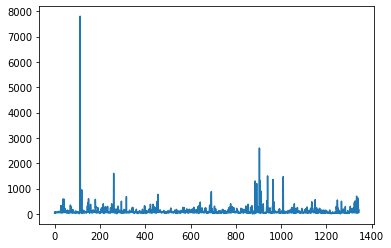

In [50]:
df['area'].plot(kind='line')

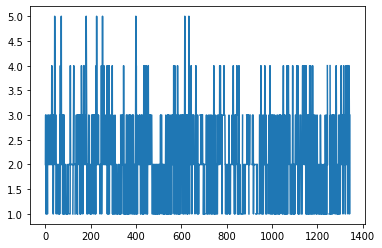

In [51]:
df['quartos'].plot(kind='line')

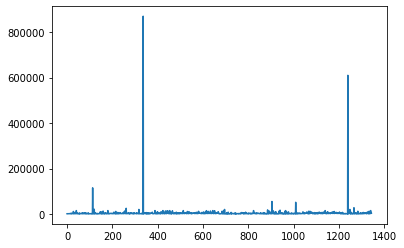

In [52]:
df['aluguel'].plot(kind='line')

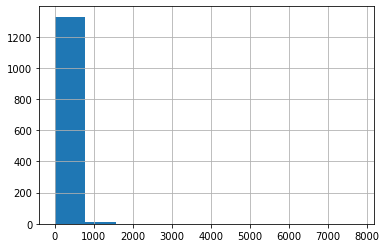

In [46]:
df['area'].hist();

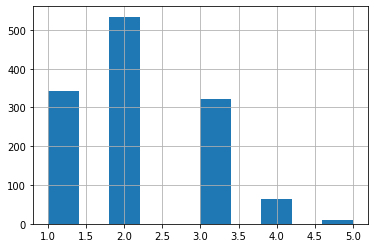

In [47]:
df['quartos'].hist();

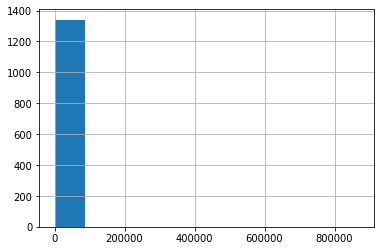

In [48]:
df['aluguel'].hist();

In [53]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

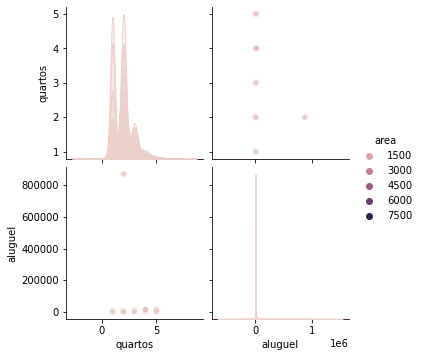

In [55]:
sns.pairplot(df, hue='area')

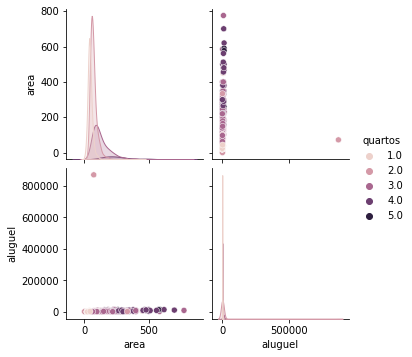

In [56]:
sns.pairplot(df, hue='quartos')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

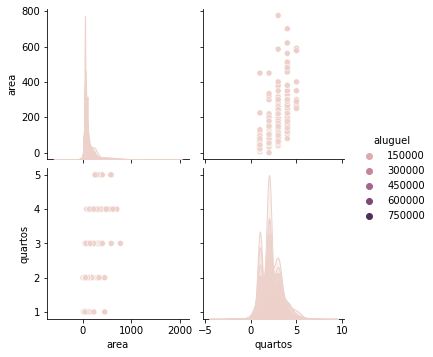

In [57]:
sns.pairplot(df, hue='aluguel')

In [58]:
df.corr()

,area,quartos,aluguel
area,1.000000,0.646019,0.133302
quartos,0.646019,1.000000,0.043724
aluguel,0.133302,0.043724,1.000000


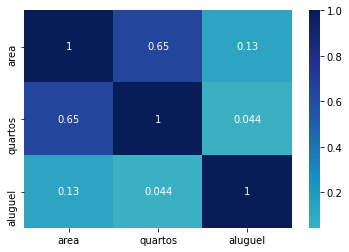

In [59]:
sns.heatmap(df.corr(), annot=True, center=0, cmap="YlGnBu")

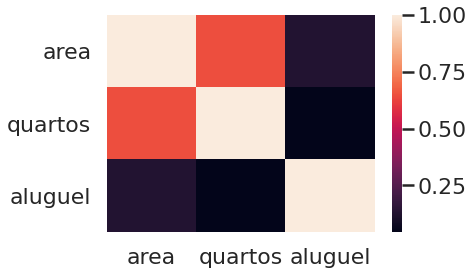

In [69]:
sns.heatmap(df.corr())

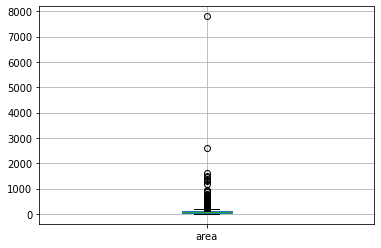

In [60]:
df.boxplot('area')

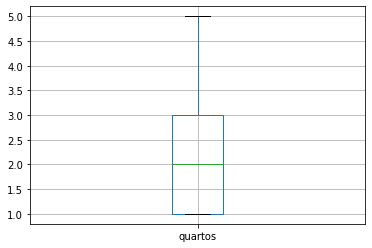

In [61]:
df.boxplot('quartos')

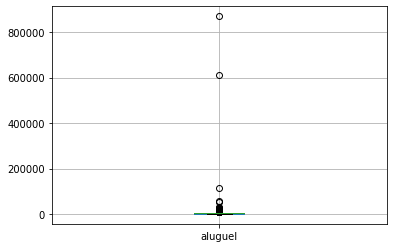

In [62]:
df.boxplot('aluguel')

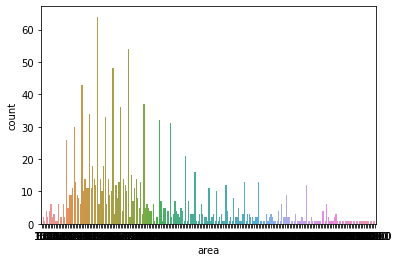

In [63]:
sns.countplot(x='area', data=df)

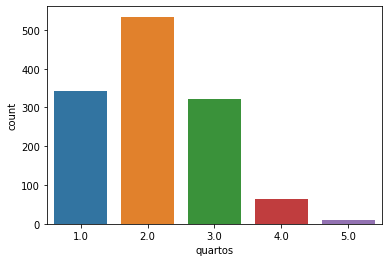

In [64]:
sns.countplot(x='quartos', data=df)

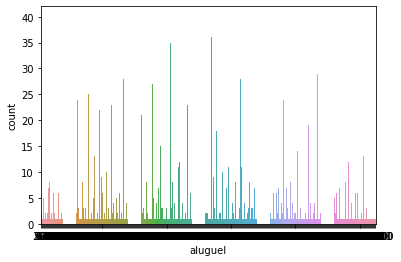

In [65]:
sns.countplot(x='aluguel', data=df)

In [70]:
import warnings
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [71]:
from statsmodels.tsa.stattools import adfuller

In [72]:
def teste (dataset):
  df_teste = adfuller(dataset,autolag = 'AIC')
  print('1. ADF :',df_teste[0])
  print('2. P.Value :',df_teste[1])
  print('3. Num of Lags :',df_teste[2])
  print('4. Num of observations used for ADF regression and cristical values calculation :',df_teste[3])
  print('5. Cristical values:')
  for l, val in df_teste[4].items():
    print("\t",l, ": ", val)

In [73]:
teste(df['aluguel'])

1. ADF : -36.803514242597345
2. P.Value : 0.0
3. Num of Lags : 0
4. Num of observations used for ADF regression and cristical values calculation : 1343
5. Cristical values:
	 1% :  -3.43522851297339
	 5% :  -2.8636944861078013
	 10% :  -2.5679170525584523
